In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, Bidirectional

In [3]:
df = pd.read_csv('INFY.csv')

In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
496,2018-12-21,9.21,9.31,9.10,9.10,8.816996,15286200
497,2018-12-24,9.19,9.24,9.07,9.08,8.797617,8590700
498,2018-12-26,9.15,9.38,9.12,9.38,9.088287,9004200
499,2018-12-27,9.30,9.45,9.28,9.45,9.156109,9856500
500,2018-12-28,9.48,9.50,9.38,9.43,9.136732,6818500


In [5]:
nRow,nCol = df.shape
print("There are",nRow,"rows of dataset and",nCol,"columns of dataset.")

There are 501 rows of dataset and 7 columns of dataset.


##### Data Visualization

In [6]:
df = df.iloc[:493]

In [7]:
df.shape

(493, 7)

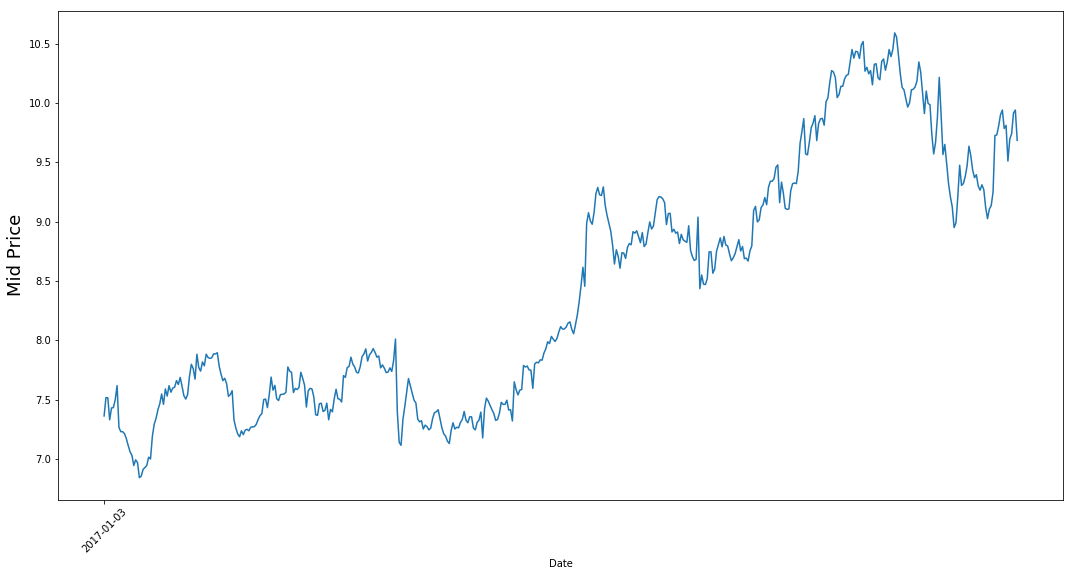

In [8]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

##### This graph shows that the dataset is bursting with different behaviours of stock prices over time.

In [9]:
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0
print("mid prices are ",mid_prices)

mid prices are  [ 7.3625  7.5175  7.515   7.33    7.43    7.4325  7.5     7.6175  7.265
  7.23    7.23    7.2125  7.17    7.1125  7.06    7.03    6.945   6.9925
  6.97    6.8425  6.855   6.9125  6.9275  6.945   7.015   7.      7.19
  7.2925  7.3425  7.415   7.465   7.5475  7.46    7.59    7.53    7.6175
  7.5625  7.5975  7.605   7.66    7.6275  7.6875  7.6125  7.5325  7.505
  7.5425  7.695   7.7975  7.7625  7.6725  7.8825  7.77    7.74    7.8175
  7.785   7.8825  7.855   7.8475  7.8525  7.885   7.885   7.895   7.7825
  7.715   7.66    7.68    7.635   7.5275  7.5425  7.575   7.3275  7.26
  7.21    7.1875  7.2375  7.205   7.2425  7.25    7.2375  7.2675  7.27
  7.2725  7.2925  7.3325  7.365   7.3825  7.5     7.505   7.4325  7.5425
  7.69    7.58    7.62    7.5075  7.4925  7.5425  7.545   7.5475  7.5625
  7.775   7.74    7.73    7.56    7.595   7.585   7.6025  7.73    7.68
  7.6225  7.4375  7.575   7.595   7.59    7.5225  7.3725  7.3675  7.465
  7.47    7.4     7.41    7.47    7.33    7.41

C:\Users\Dell\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
mid_prices.shape

(493,)

In [11]:
train_size = int(len(df) * 0.80400)
test_size = len(df) - train_size

In [12]:
train_data = mid_prices[:400]
test_data = mid_prices[400:]

In [13]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [14]:
df['MA_window_10'] = df['Close'].rolling(10).mean().shift() 
df['MA_window_20'] = df['Close'].rolling(20).mean().shift()

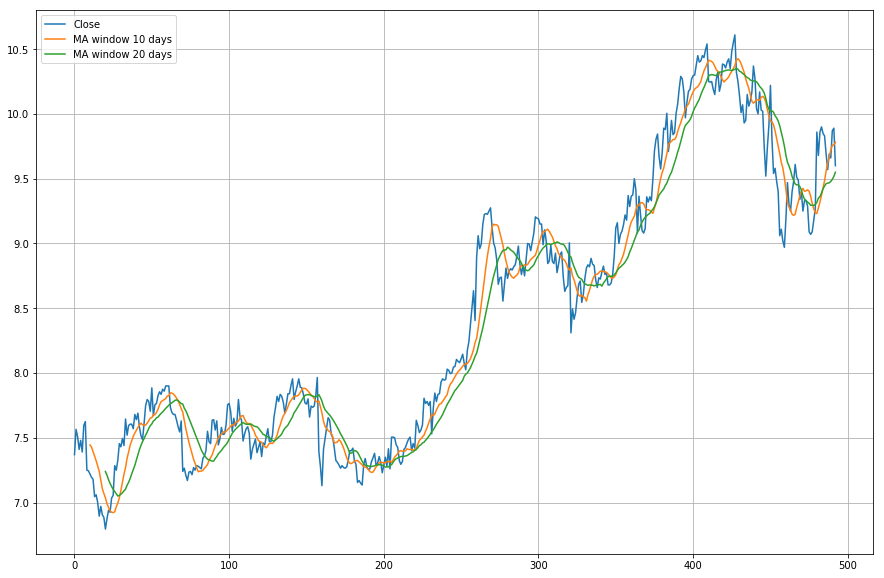

In [15]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'], label='Close')
plt.plot(df['MA_window_10'], label='MA window 10 days')
plt.plot(df['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

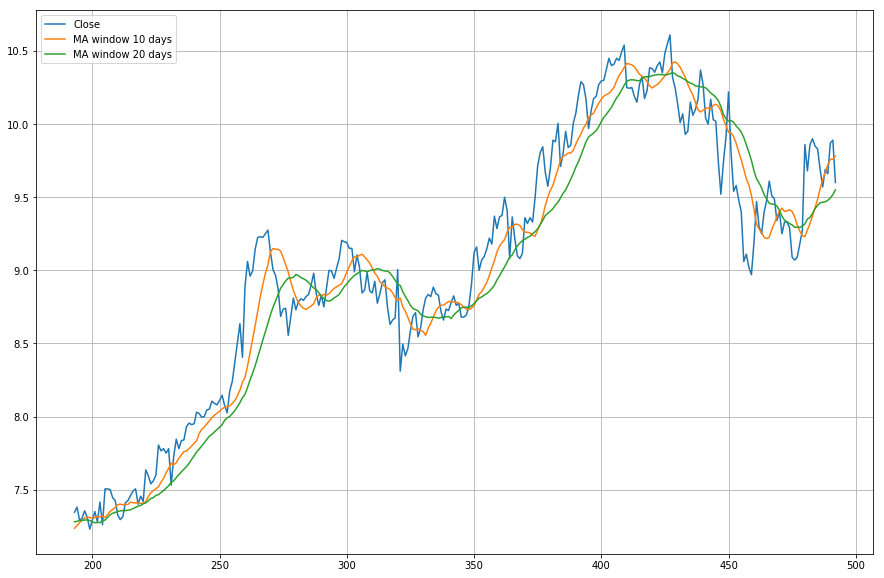

In [16]:
limit = 300

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'][-limit:], label='Close')
plt.plot(df['MA_window_10'][-limit:], label='MA window 10 days')
plt.plot(df['MA_window_20'][-limit:], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

In [17]:
look_back = 40
forward_days = 5
num_periods = 20

In [18]:
df1 = df
df1['Date'] = pd.to_datetime(df['Date'])
df1.set_index('Date',inplace=True)

In [19]:
df1 = df1['Close']

In [20]:
df1.shape

(493,)

In [21]:
df1.head()

Date
2017-01-03    7.370
2017-01-04    7.565
2017-01-05    7.510
2017-01-06    7.410
2017-01-09    7.480
Name: Close, dtype: float64

#### Data Visualization

C:\Users\Dell\Anaconda3\envs\data-x\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


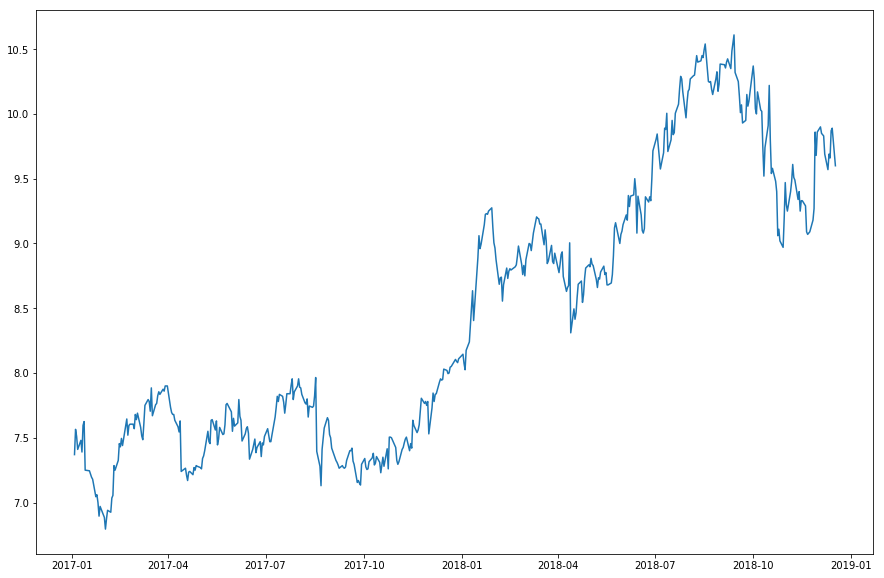

In [22]:
plt.figure(figsize=(15,10))
plt.plot(df1)
plt.show()

#### Data Normalization

In [23]:
dataset = df1.values.reshape(df1.shape[0],1)
dataset[:5]

array([[7.37 ],
       [7.565],
       [7.51 ],
       [7.41 ],
       [7.48 ]])

In [25]:
dataset.shape

(493, 1)

In [26]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset[:5]

array([[0.15072084],
       [0.20183486],
       [0.18741809],
       [0.16120577],
       [0.17955439]])

In [27]:
num_periods = 20
division = len(dataset) - num_periods*forward_days

In [28]:
test_ = dataset[division-look_back:]
train_ = dataset[:division]

In [29]:
def preprocess_dataset(dataset, look_back, forward_days, lag = 1):
    X, Y = [],[]
    for i in range(0, len(dataset) - look_back - forward_days + 1, lag):
        X.append(dataset[i:(i+look_back)])
        Y.append(dataset[(i+look_back):(i+look_back+forward_days)])
    return np.array(X), np.array(Y)

In [30]:

X,y = preprocess_dataset(dataset,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
print("x_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_validate shape ",X_validate.shape)
print("y_validate shape ",y_validate.shape)

x_train shape  (359, 40, 1)
y_train shape  (359, 5)
X_validate shape  (90, 40, 1)
y_validate shape  (90, 5)


In [33]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### LSTM Model

In [34]:
model = Sequential()
model.add(LSTM(64,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(32,input_shape=(64,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,y_train,epochs=12,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Train on 287 samples, validate on 72 samples
Epoch 1/12
287/287 - 21s - loss: 0.0287 - val_loss: 0.0074
Epoch 2/12
287/287 - 11s - loss: 0.0055 - val_loss: 0.0044
Epoch 3/12
287/287 - 11s - loss: 0.0056 - val_loss: 0.0059
Epoch 4/12
287/287 - 11s - loss: 0.0055 - val_loss: 0.0043
Epoch 5/12
287/287 - 10s - loss: 0.0047 - val_loss: 0.0049
Epoch 6/12
287/287 - 10s - loss: 0.0048 - val_loss: 0.0039
Epoch 7/12
287/287 - 11s - loss: 0.0053 - val_loss: 0.0053
Epoch 8/12
287/287 - 10s - loss: 0.0045 - val_loss: 0.0032
Epoch 9/12
287/287 - 10s - loss: 0.0039 - val_loss: 0.0051
Epoch 10/12
287/287 - 10s - loss: 0.0038 - val_loss: 0.0068
Epoch 11/12
287/287 - 11s - loss: 0.0039 - val_loss: 0.0028
Epoch 12/12
287/287 - 11s - loss: 0.0039 - val_loss: 0.0043


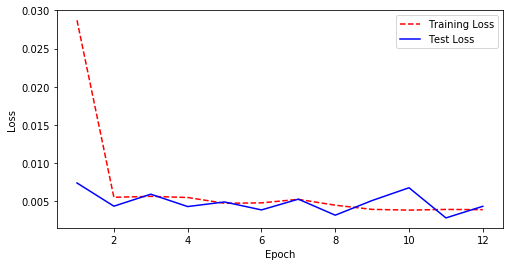

In [35]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [36]:
model.save("stock_prices_prediction.h5")

In [38]:
Xt = model.predict(X)
Xt = Xt.ravel()

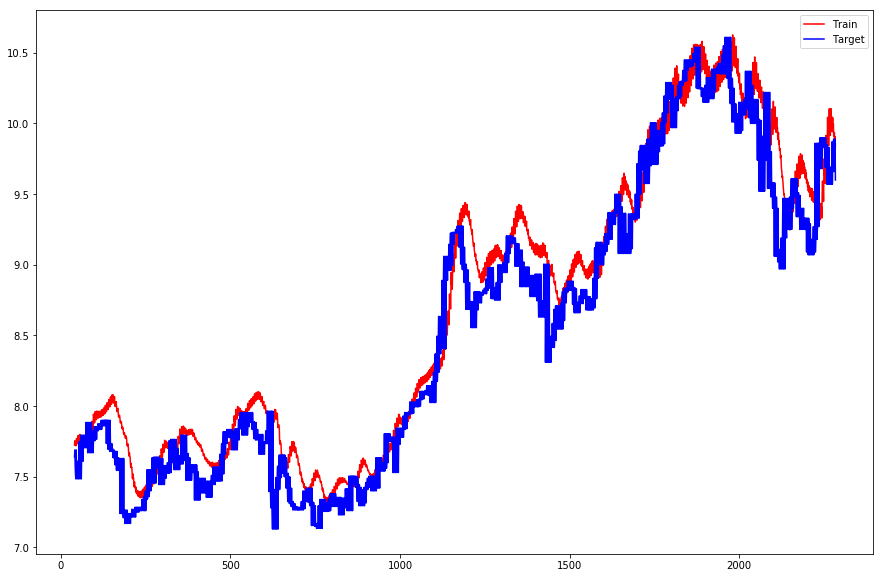

In [39]:
x = model.predict(X)
x = x.ravel()

plt.figure(figsize = (15,10))
plt.plot([x for x in range(look_back, look_back+len(x))], scaler.inverse_transform(x.reshape(-1,1)), color='r', label='Train')
plt.plot([x for x in range(look_back, look_back+len(x))], scaler.inverse_transform(y.reshape(-1,1)), color='b', label='Target')
plt.legend()
plt.show()

In [76]:
jan_df = pd.read_csv('INFY_JAN.csv')

In [77]:
jan_df.Date = pd.to_datetime(jan_df['Date'])
jan_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
16,2019-01-24,10.53,10.55,10.43,10.43,10.160633,6627700
17,2019-01-25,10.51,10.58,10.41,10.55,10.277534,8839100
18,2019-01-28,10.49,10.57,10.44,10.52,10.248309,5192200
19,2019-01-29,10.49,10.53,10.42,10.48,10.209341,8271100
20,2019-01-30,10.46,10.63,10.42,10.59,10.316501,7026000


In [78]:
jan_df.set_index('Date', inplace=True)

In [79]:
jan_df = jan_df['Close']
jan_df.head()

Date
2018-12-31    9.52
2019-01-02    9.61
2019-01-03    9.47
2019-01-04    9.63
2019-01-07    9.71
Name: Close, dtype: float64

In [80]:
jan_df = jan_df.values.reshape(jan_df.shape[0],1)
jan_df.shape

(21, 1)

In [81]:
jan_df = scaler.fit_transform(jan_df)
jan_df[:5]

array([[0.04166667],
       [0.11666667],
       [0.        ],
       [0.13333333],
       [0.2       ]])

In [82]:
xtest = dataset[-40:]

x_pred = []
for i in range(5):
    x = xtest[-40:]
    x_test = model.predict(x.reshape(1,40,1))
    x_pred.append(x_test)
    np.append(xtest,x_test.T)

In [83]:
x_pred = np.array(x_pred) 

In [84]:
jan_df.reshape(-1,1).shape

(21, 1)

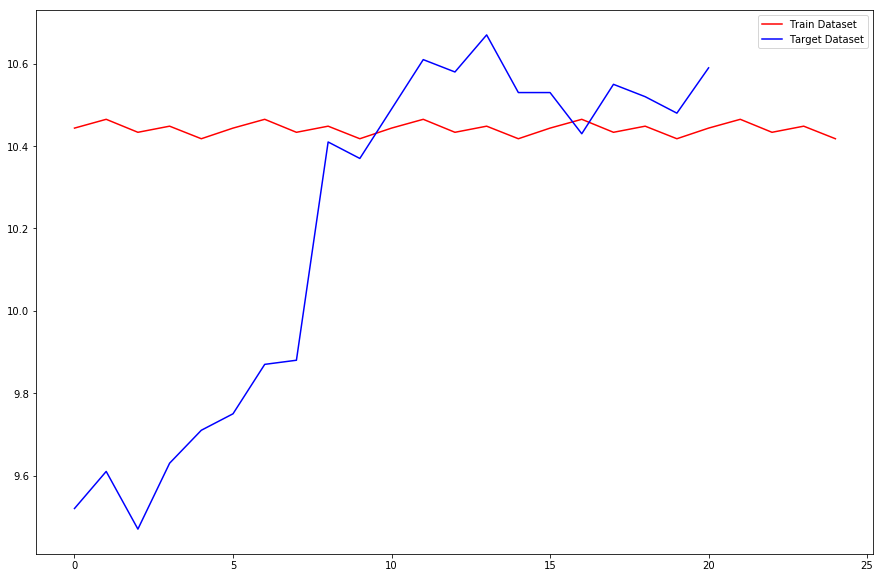

In [85]:
plt.figure(figsize = (15,10))
plt.plot([x for x in range(len(jan_df)+4)], scaler.inverse_transform(x_pred.reshape(-1,1)), color='r', label='Train Dataset')
plt.plot([x for x in range(len(jan_df))], scaler.inverse_transform(jan_df.reshape(-1,1)), color='b', label='Target Dataset')
plt.legend()
plt.show()

#### This reflects that the historical stock prices as well as the other factors contribute to make a profitable prediction. So, to enhance the prediction of my model, I used my own predicted days to update prediction w/ actual values.

#### Part C

In [54]:
xtest = dataset[-40:]
jan_df = np.append(xtest,jan_df)

X_jan,y_jan = preprocess_dataset(jan_df,look_back,forward_days)
y_jan = np.array([list(a.ravel()) for a in y_jan])

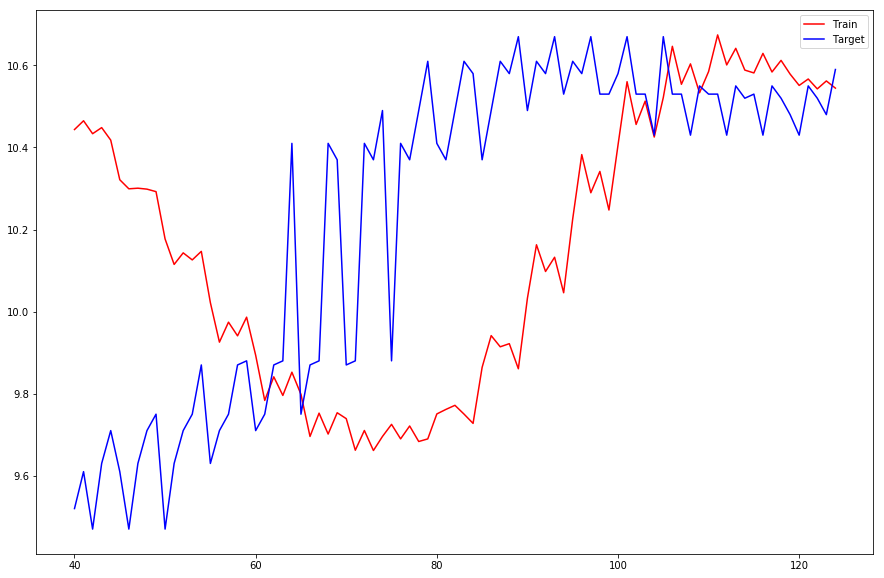

In [56]:
x_jan = model.predict(X_jan.reshape(X_jan.shape[0],X_jan.shape[1],1))
x_jan = x_jan.ravel()

plt.figure(figsize = (15,10))

plt.plot([x for x in range(look_back, look_back+len(x_jan))], scaler.inverse_transform(x_jan.reshape(-1,1)), color='r', label='Train')

plt.plot([x for x in range(look_back, look_back+len(x_jan))], scaler.inverse_transform(y_jan.reshape(-1,1)), color='b', label='Target')

plt.legend()
plt.show()